### Question 1

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [100]:
np.random.seed(0)
X = np.random.rand(100)
Y = X**2 + 2*X + np.random.rand(100)

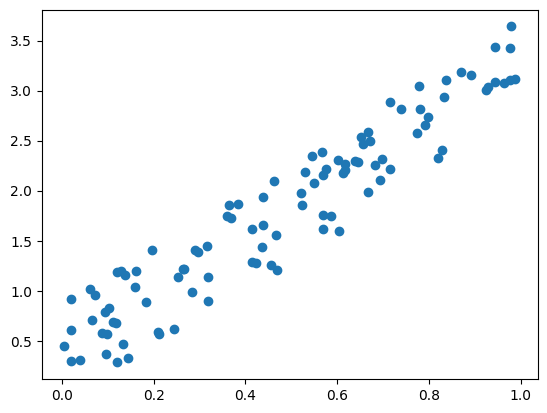

In [101]:
plt.scatter(X,Y)
plt.show()

In [102]:
def hypothesis_3(w, x, b):
    return w * x + b

def hypothesis_7(u, v, w, x):
    return u * x + v * x**2 + w

In [103]:
def loss_function_3(Y, h):
    return np.mean(np.abs(Y - h) ** 3)

def loss_function_7(Y, h):
    return np.mean(np.abs(Y - h) ** 7)

In [104]:
def gradient_descent_3(w, b, X, Y, alpha):
    h = hypothesis_3(w, X, b)
    dw = -3 * np.sum(X * (Y - h) ** 2 * np.sign(Y - h))
    db = -3 * np.sum((Y - h) ** 2 * np.sign(Y - h))
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

In [105]:
epoch_3 = 5000000
alpha_3 = 0.000000001
w_3 = np.random.randn(1)
b_3 = np.random.randn(1)

In [107]:
for i in range(epoch_3):
    w_3, b_3 = gradient_descent_3(w_3, b_3, X, Y, alpha_3)

In [108]:
def gradient_descent_7(u, v, w, X, Y, alpha):
    h = hypothesis_7(u, v, w, X)
    du = -7 * np.sum(X * (Y - h) ** 6 * np.sign(Y - h))
    dv = -7 * np.sum((Y - h) ** 6 * X**2 * np.sign(Y - h))
    dw = -7 * np.sum((Y - h) ** 6 * np.sign(Y - h))
    u = u - alpha * du
    v = v - alpha * dv
    w = w - alpha * dw
    return u, v, w

In [109]:
epoch_7 = 2
alpha_7 = 0.00000000000000000000000000000001

u_7, v_7, w_7 = 1, 0.5, 0.5

In [110]:
for i in range(epoch_7):
    u_7, v_7, w_7 = gradient_descent_7(u_7, v_7, w_7, X, Y, alpha_7)

In [111]:
X_reshaped = X.reshape(-1, 1)
model_sklearn = LinearRegression()
model_sklearn.fit(X_reshaped, Y)

LinearRegression()

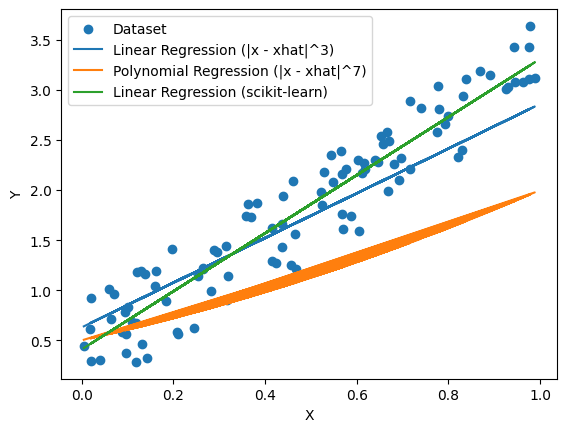

In [112]:
plt.scatter(X, Y, label='Dataset')
plt.plot(X, hypothesis_3(w_3, X, b_3), label='Linear Regression (|x - xhat|^3)')
plt.plot(X, hypothesis_7(u_7, v_7, w_7, X), label='Polynomial Regression (|x - xhat|^7)')
plt.plot(X, model_sklearn.predict(X_reshaped), label='Linear Regression (scikit-learn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [113]:
print("Linear Regression Coefficients (|x - xhat|^3):")
print("w:", w_3)
print("b:", b_3)

print("\nPolynomial Regression Coefficients (|x - xhat|^7):")
print("u:", u_7)
print("v:", v_7)
print("w:", w_7)

print("\nLinear Regression Coefficients (scikit-learn):")
print("Intercept:", model_sklearn.intercept_)
print("Coefficient:", model_sklearn.coef_[0])

Linear Regression Coefficients (|x - xhat|^3):
w: [2.23238598]
b: [0.62833078]

Polynomial Regression Coefficients (|x - xhat|^7):
u: 1.0
v: 0.5
w: 0.5

Linear Regression Coefficients (scikit-learn):
Intercept: 0.4082961885212979
Coefficient: 2.9019521031651583


### Question 2

In [62]:
#install openpyxl before runinng this 
#pip install openpyxl
df=pd.read_excel("AirQualityUCI.xlsx")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [63]:
df.shape

(9357, 15)

In [64]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [65]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [66]:
df['CO(GT)'].min()

-200.0

Text(0.5, 1.0, 'AH')

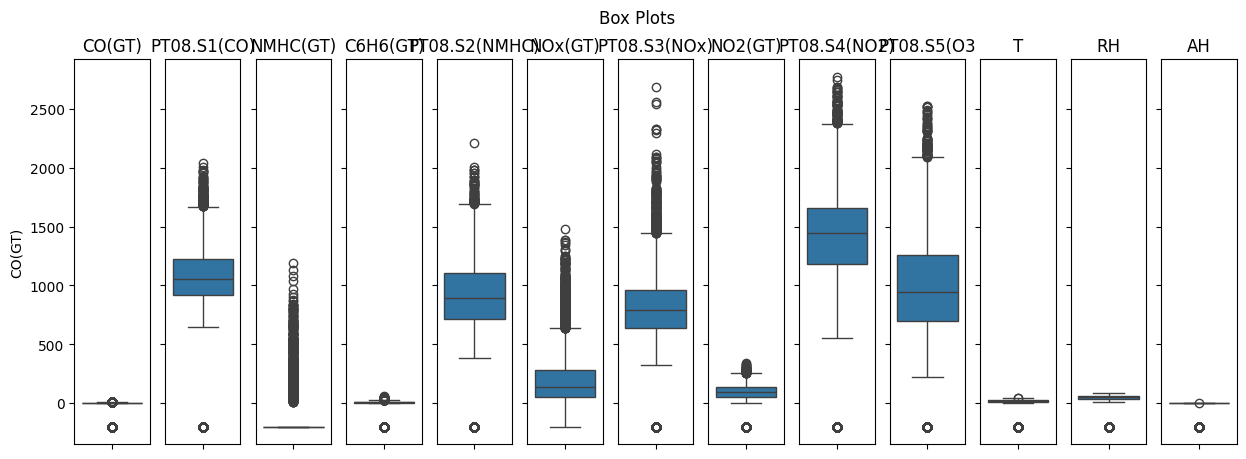

In [67]:
fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")

sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")

In [68]:
correlation_matrix = df.iloc[:,2:].corr()
correlation_matrix.RH[abs(correlation_matrix['RH'])>0.05].index

Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

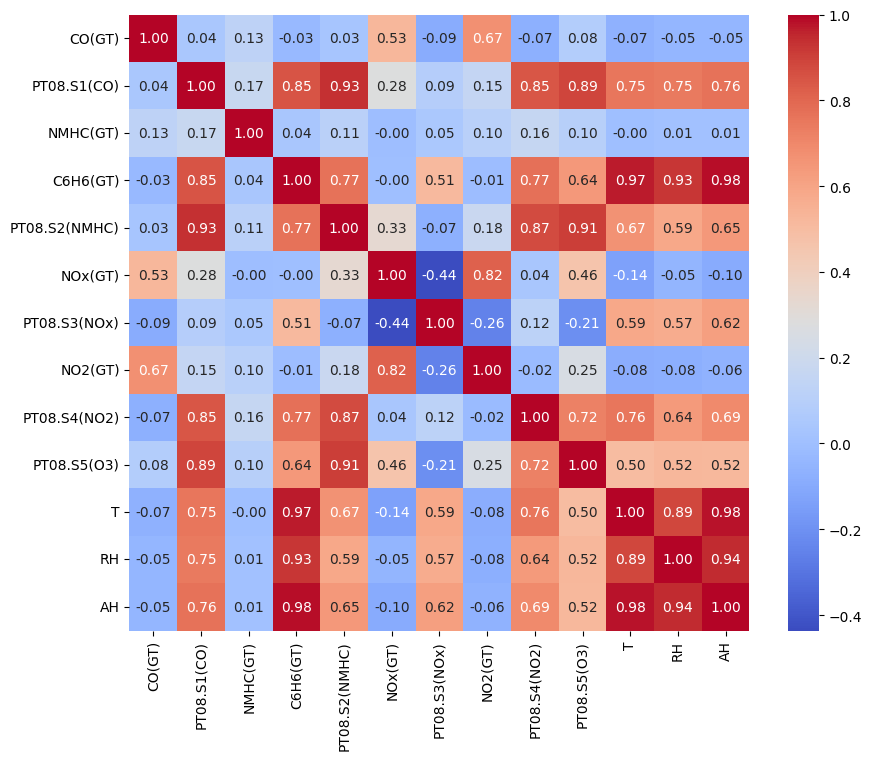

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [69]:
percentile25 = df['CO(GT)'].quantile(0.25)
percentile75 = df['CO(GT)'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75+iqr
lower_limit = percentile25-iqr

In [70]:
# Defining the lower limit
lower_limit  

filtered_subset = df.loc[df["CO(GT)"] < lower_limit].copy()

filtered_subset.loc[:, 'CO(GT)'] = lower_limit

df.loc[filtered_subset.index] = filtered_subset

In [71]:
# Defining the upper limit
upper_limit  

filtered_subset = df.loc[df["CO(GT)"] < upper_limit].copy()

filtered_subset.loc[:, 'CO(GT)'] = upper_limit

df.loc[filtered_subset.index] = filtered_subset

<Axes: ylabel='CO(GT)'>

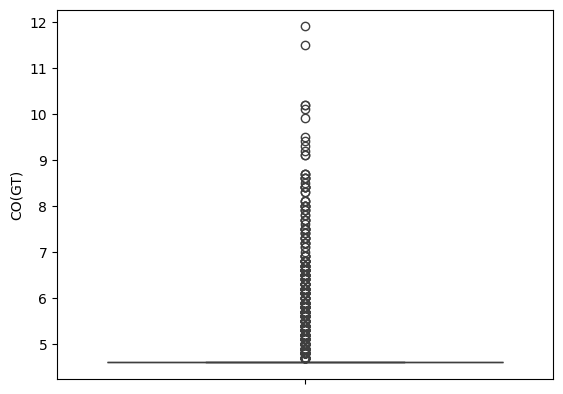

In [72]:
sns.boxplot(df['CO(GT)'])

In [73]:
df['CO(GT)'].describe()

count    9357.000000
mean        4.665651
std         0.385578
min         4.600000
25%         4.600000
50%         4.600000
75%         4.600000
max        11.900000
Name: CO(GT), dtype: float64

In [74]:
for i in range(10):
    percentile25=df[df.columns[i+2]].quantile(0.25)
    percentile75=df[df.columns[i+2]].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+iqr
    lower_limit=percentile25-iqr
    
    lower_limit  
    filtered_subset = df.loc[df[df.columns[i+2]] < lower_limit].copy()
    filtered_subset.loc[:, df.columns[i+2]] = lower_limit
    df.loc[filtered_subset.index] = filtered_subset

    upper_limit 
    filtered_subset = df.loc[df[df.columns[i+2]] < upper_limit].copy()
    filtered_subset.loc[:, df.columns[i+2]] = upper_limit
    df.loc[filtered_subset.index] = filtered_subset

Text(0.5, 1.0, 'AH')

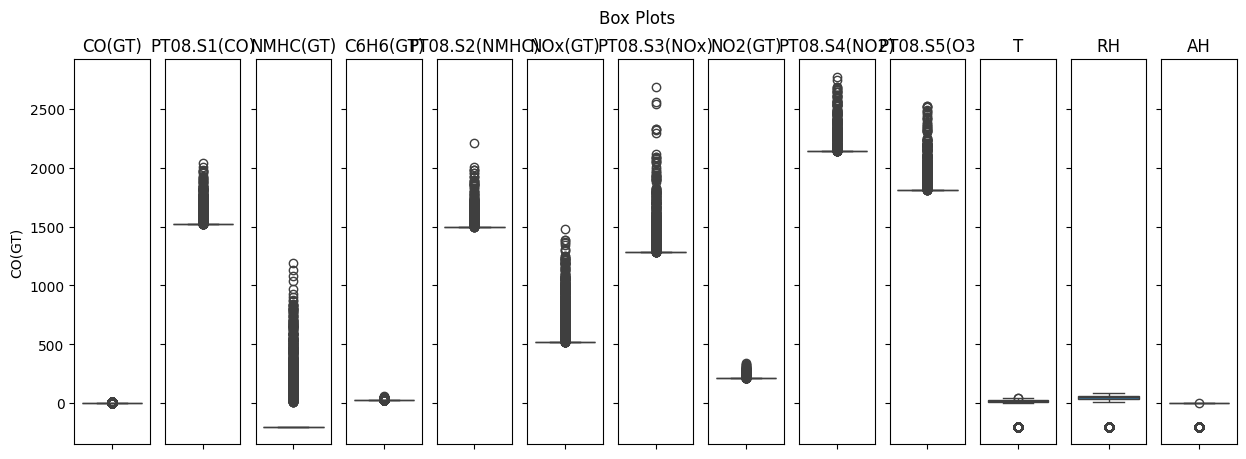

In [75]:
fig, axes = plt.subplots(1, 13, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots')

sns.boxplot(ax=axes[0],data=df['CO(GT)'])
axes[0].set_title("CO(GT)")

sns.boxplot(ax=axes[1],data=df['PT08.S1(CO)'])
axes[1].set_title("PT08.S1(CO)")

sns.boxplot(ax=axes[2],data=df['NMHC(GT)'])
axes[2].set_title("NMHC(GT)")

sns.boxplot(ax=axes[3],data=df['C6H6(GT)'])
axes[3].set_title("C6H6(GT)")

sns.boxplot(ax=axes[4],data=df['PT08.S2(NMHC)'])
axes[4].set_title("PT08.S2(NMHC)")

sns.boxplot(ax=axes[5],data=df['NOx(GT)'])
axes[5].set_title("NOx(GT)")

sns.boxplot(ax=axes[6],data=df['PT08.S3(NOx)'])
axes[6].set_title("PT08.S3(NOx)")

sns.boxplot(ax=axes[7],data=df['NO2(GT)'])
axes[7].set_title("NO2(GT)")

sns.boxplot(ax=axes[8],data=df['PT08.S4(NO2)'])
axes[8].set_title("PT08.S4(NO2)")

sns.boxplot(ax=axes[9],data=df['PT08.S5(O3)'])
axes[9].set_title("PT08.S5(O3")

sns.boxplot(ax=axes[10],data=df['T'])
axes[10].set_title("T")

sns.boxplot(ax=axes[11],data=df['RH'])
axes[11].set_title("RH")

sns.boxplot(ax=axes[12],data=df['AH'])
axes[12].set_title("AH")


In [76]:
correlation_matrix = df.iloc[:,2:].corr()
correlation_matrix.RH[abs(correlation_matrix['RH'])>0.05].index

Index(['NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], dtype='object')

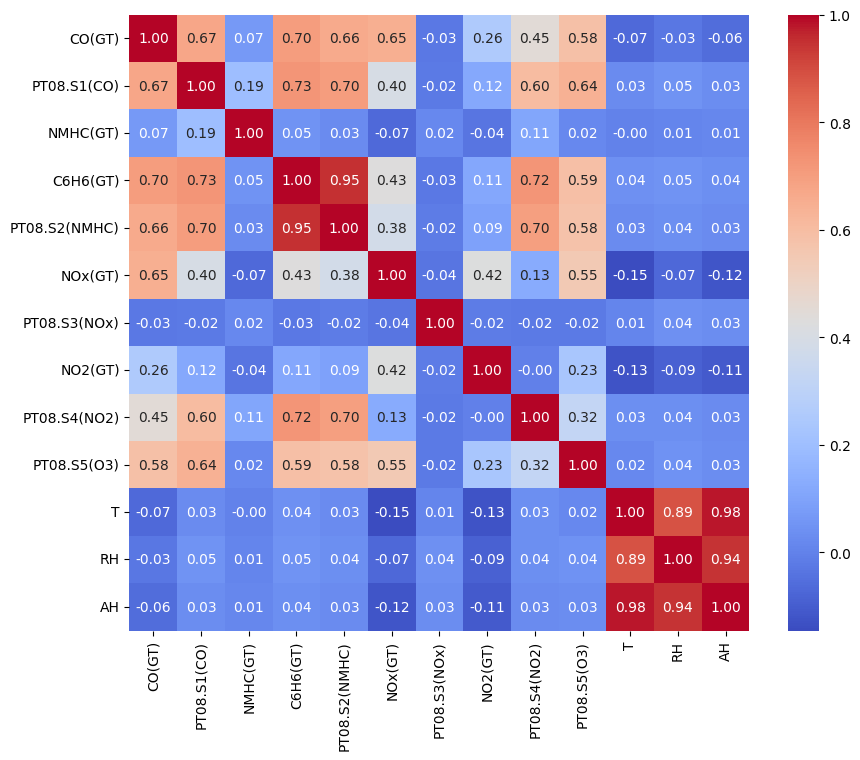

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [78]:
df=df.drop(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)','Date','Time'], axis=1)

In [79]:
y=df['RH']
df=df.drop(['RH'],axis=1)
X=df
y

0       48.875001
1       47.700000
2       53.975000
3       60.000000
4       59.575001
          ...    
9352    29.250000
9353    23.725000
9354    18.350000
9355    13.550000
9356    13.125000
Name: RH, Length: 9357, dtype: float64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [82]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [84]:
y_predict2=model1.predict(X_test)

In [85]:
r2_score(y_predict2,y_test)

0.9234954219907472

Text(0, 0.5, 'Actual values')

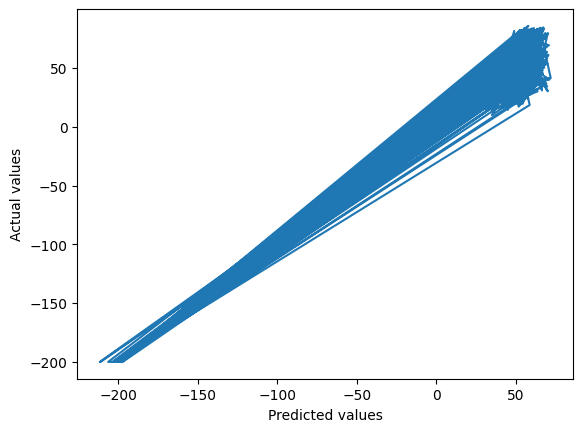

In [87]:
plt.plot(y_predict2,y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [92]:
A=np.ones((9357,1)).reshape(-1,1)
B=np.hstack((A,X))
dB=pd.DataFrame(B)
X=dB

In [93]:
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [94]:
m = y.size
theta = np.zeros((X_train.shape[1], 1))

In [95]:
epoch=10000
alpha=0.000000000000005

In [96]:
for i in range(epoch):
    y_predict3 = np.matmul(X_train,theta)
    a = (np.abs(y_predict3.iloc[:,0]-y_train))
    b = (alpha*(np.matmul(X_train.T,(np.abs(a)))/y.size))
    b_array = b.values  
    b_reshaped = b_array.reshape(-1, 1)
    theta = theta-b_reshaped

In [97]:
y_predict3 = np.matmul(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_predict3.iloc[:,0]-y_train))
error

0.0

In [98]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 0.0 %
Test Accuracy is : 100.0 %
